## DS-UA 301 Assignment 2

Welcome back! In this notebook, we will explore and practice several foundational concepts and techniques in Natural Language Processing, specifically in the "operate" stage: 
+ Transforming documents into numbers
+ Characterising documents
+ Comparing documents 
+ Sentiment analysis

We'll also *continue to* think about approaching our NLP work from a hypothesis-driven approach. I know you're probably sick of this, but I cannot overstate how important and useful it is to be super comfortable with thinking like this for all things job, discovery, and satisfaction-related (I think my claims are getting bolder as we go, but I stand by them!).

Some tips (mostly the same as before, but good reminders): 
+ As with Assignment 1, you may use any data you like (built-in NLTK or something else!) as long as you are able to complete all the prompts below.
+ As with Assignment 1, you're welcome to use a subset or the full dataset you plan to use for the project. No need to do the same thing twice. If you're still working on collecting your data, I suggest working with a "toy" mini-set (again, as long as it's big enough to complete the prompts).
+ As before, while we will be grading you for correctness and completeness; i.e., you must correctly complete the specific tasks we ask of you, there is rarely a single "right answer" when it comes to *which* strategy to use. We care more that you thoughtfully and transparently explain your reasoning, rather than worrying whether you're "right".
+ As before, 2-3 sentences (at most!) for the non-code questions should generally be enough. No need for essays!

Finally, each question is worth 1 point, for 60 points total.

## 1. Any pre-processing needed

(a) We are going to begin this assignment from text that has already been pre-processed. You may thus use your text and/or program from Assignment 1 to pre-process your text here (no need to comment or explain anything, as you already did that). If you're using brand new text, you might need to do a bit more work, but a little extra practice won't work.

Complete any pre-processing you need to do here, whether it's copying over your work from Assignment 1 or borrowing some of it as you apply it to a new text. 

*(Recap: what counts as pre-processing? Everything you did in Assignment 1!)*


http://www.thegrammarlab.com/?nor-portfolio=corpus-of-presidential-speeches-cops-and-a-clintontrump-corpus

^^^^

Where I got the data from!

In [49]:
import nltk
import string
from collections import Counter
import pandas as pd
import numpy as np
import spacy
from spacy_readability import Readability
statess = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", 
               "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", 
               "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", 
               "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", 
               "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
states = [word.lower() for word in statess]
stop_words = set(nltk.corpus.stopwords.words('english'))
clinton = open("clinton.txt", "r").read().lower()
trump = open("trump.txt", "r").read().lower()
clinton_raw = nltk.word_tokenize(clinton)
trump_raw = nltk.word_tokenize(trump)
removable_words = ['applause', "'s" , "'re", '--', "n't", 'title=', "''", "'ve", '...', 'delivers', 'remarks', "\\users\\rodrigo", "gaming", "pc\\dropbox\\nlp", "corpus\\clinton-trump", "gaming", 
                   '``', 'c', '\\users\\rodrigo', 'rl\\homework', '2\\clinton-trump', 'presidential', 'audience']
clinton_tokens_stopwords = [elem for elem in clinton_raw if elem not in string.punctuation and elem not in removable_words]
trump_tokens_stopwords  = [elem for elem in trump_raw if elem not in string.punctuation and elem not in removable_words]
clinton_tokens = [elem for elem in clinton_raw if elem not in string.punctuation and elem not in stop_words and elem not in removable_words]
trump_tokens  = [elem for elem in trump_raw if elem not in string.punctuation and elem not in stop_words and elem not in removable_words]
proper_nouns = ['trump', 'donald', 'hillary', 'clinton', 'america']
for word in range(len(clinton_tokens)):
    if clinton_tokens[word] in proper_nouns or clinton_tokens[word] in states:
        clinton_tokens[word] = clinton_tokens[word].capitalize()
for word in range(len(trump_tokens)):
    if trump_tokens[word] in proper_nouns or trump_tokens[word] in states:
        trump_tokens[word] = trump_tokens[word].capitalize()
clinton_postag = nltk.pos_tag(clinton_tokens)
trump_postag = nltk.pos_tag(trump_tokens)

## 2. Transforming documents into numbers

We're going to need to turn our documents into numbers in order to proceed. We'll take care of that in this step.

(a) First, to make sure we're clear on what we're doing here: What is the Bag of Words (BOW) assumption, and why do we use it? What's so useful about it?

BOW is a way to simplify a text to be able to be used in modeling. 

(b) What is at least one treadeoff, or shortcoming, when it comes to working under the BOW assumption?

The problem is it simplifies perhaps too much, and several words could appear twice in the bag. 

(c) It's time for our simplest expression of text as numeric data: the Document-Term Matrix (DTM). Convert your corpus into a DTM based simply on word counts. You may or may not have stop words and/or be working with stems/lemmas depending on your decisions you made in Question 1.

*(Note: you can always go back and adjust your preprocessing decisions as you work through Assignment 2, just make sure to turn in the final product. There's no need to re-explain your pre-processing decisions in this Assignment, even if you tweak it as you go, as we got plenty of that last time and there's more to come in the project.)*

In [2]:
t_count = Counter()
c_count = Counter()
c_count.update(word for word in clinton_tokens)
t_count.update(word for word in trump_tokens)
clinton_count = dict(c_count)
trump_count = dict(t_count)
dtm1 = pd.DataFrame(trump_count, index=[0]) 
dtm2 = pd.DataFrame(clinton_count, index=[1]) 
dtm = dtm1.merge(dtm2, how='outer')

In [3]:
dtm = dtm.rename(index={0: 'Trump', 1:'Clinton'}).fillna(0)
dtm.loc['Total']= dtm.sum()
dtm['Total'] = dtm.sum(axis=1)
dtm

,Donald,Trump,republican,candidate,volunteers,national,convention,date,2016-07-22,pence,...,worship,achieving,holton,graceful,crisscrossed,four-month-old,setbacks,deserving,seasons,Total
Trump,385.0,2479.0,176.0,132.0,5.0,159.0,38.0,99.0,1.0,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223084.0
Clinton,308.0,447.0,50.0,58.0,4.0,87.0,55.0,36.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,61819.0
Total,693.0,2926.0,226.0,190.0,9.0,246.0,93.0,135.0,1.0,82.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,284903.0


(d) DTMs are typically sparse matrices. What do we mean by "sparse matrix", and is yours one? How do you know?

Not really, there are only two indices and I don't think there are many words that either candidate would use that the other wouldn't. 

(e) We also discussed that DTMs require lossy compression. What is meant by "lossy compression" and why might it matter for some analyses? Does it matter for yours?

Lossy compression means losing some of the original information on a dataset to allow for smaller sizes. I don't know if it matters much in this case to be honest since I counted every single word by code and not by any other method from NLTK or any other module.

(f) DTMs do not have to be limited top single words; we can use n-grams as well. Create a DTM based on an n-gram with an *n* size you think is appropriate for your text. (If you think unigrams are most appropriate, indulge me and pick a runner-up :)!)

In [4]:
bgs_trump = nltk.trigrams(trump_tokens)
fdist_trump = nltk.FreqDist(bgs_trump)
bgs_clinton = nltk.trigrams(clinton_tokens)
fdist_clinton = nltk.FreqDist(bgs_clinton)
df1_ngram = pd.DataFrame(dict(fdist_trump), index=[0]) 
df2_ngram = pd.DataFrame(dict(fdist_clinton), index=[0]) 
dtm_ngram = df1_ngram.merge(df2_ngram, how='outer')

In [5]:
dtm_ngram = dtm_ngram.rename(index={0: 'Trump', 1:'Clinton'}).fillna(0)
dtm_ngram.loc['Total']= dtm_ngram.sum()
dtm_ngram['Total'] = dtm_ngram.sum(axis=1)
dtm_ngram.T.sort_values(by='Total', ascending=False).T

,Total,make,Trump,going,Hillary,bring,usa,wall,going,Donald,...,want,protect,country,potential,adversaries,grow,missile,programs,u.s.,goes
,,America,Trump,take,Clinton,back,usa,build,make,Trump,...,protect,country,potential,adversaries,grow,missile,programs,u.s.,military,hell
,,great,Trump,care,wants,jobs,usa,wall,America,republican,...,country,potential,adversaries,grow,missile,programs,u.s.,military,facilities,laughter
Trump,223082.0,140.0,143.0,98.0,95.0,93.0,83.0,83.0,79.0,80.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Clinton,61817.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,284899.0,146.0,143.0,98.0,95.0,93.0,84.0,83.0,82.0,80.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


(g) Why did you choose that particular *n* value of n-gram? Did it improve anything in your analysis? Why or why not?

Trigrams are good enough to catch any of trumps catch phrases, and many of Hilary's, but to be honest, her phrases aren't as memorable as Trump's. We can see this above where make America great is the top with very few aid from any of Hillary's uses of the trigram, in fact, most trigrams on top are Trump's own.

(h) Usually when we work with n-grams we retain a few that might matter for our analysis. If there are any such n-grams, please add them to your unigram-based DTM now as unique terms (you can do so however you like). Why did you retain the n-grams that you did? If you are not retaining any n-grams, why not?

Of course I'm keeping some of these, I'm keeping the ones most unique to each candidate, to do that, I'll sort and find their most common trigrams excluding their names three times and usa*3

On second thought, Hillary doesn't even have many trigrams on her dtm of trigrams, most are trumps, look below for evidence.

In [6]:
dtm_ngram.T.sort_values(by='Clinton', ascending=False).T

Total Hillary            Clinton president    Hillary world  \
                  Hillary         democratic    united    Clinton   war   
                  Hillary Clinton  candidate    states democratic    ii   
Trump    223082.0     0.0     1.0        0.0      41.0        1.0   5.0   
Clinton   61817.0    37.0    29.0       29.0      25.0       23.0  22.0   
Total    284899.0    37.0    30.0       29.0      66.0       24.0  27.0   

         every candidate democratic  ...       say      help everybody help  \
        single  campaign  candidate  ...      help everybody      help  gon   
           day     event   campaign  ... everybody      help       gon   na   
Trump      7.0      59.0        0.0  ...       1.0       1.0       1.0  3.0   
Clinton   21.0      20.0       20.0  ...       0.0       0.0       0.0  0.0   
Total     28.0      79.0       20.0  ...       1.0       1.0       1.0  3.0   

               na something great America     thank     goes  
        something     going  know   great everybody     hell  
            going      make  make    want    really laughter  
Trump         1.0       1.0   1.0     2.0       2.0      1.0  
Clinton       0.0       0.0   0.0     0.0       0.0      0.0  
Total         1.0       1.0   1.0     2.0       2.0      1.0  

[3 rows x 234089 columns]

Trump's are more interesting and telling of his character (confrontational and sentimental) I'll keep 2-5 because these are great for telling trump's sentiment

In [7]:
trump_ngrams = dtm_ngram.T.sort_values(by='Trump', ascending=False).iloc[2:6].T
dtm = dtm.join(trump_ngrams)

D:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


We've merged these four trigrams into the dtm!

In [8]:
dtm

,Donald,Trump,republican,candidate,volunteers,national,convention,date,2016-07-22,pence,...,crisscrossed,four-month-old,setbacks,deserving,seasons,Total,"(make, America, great)","(going, take, care)","(Hillary, Clinton, wants)","(bring, back, jobs)"
Trump,385.0,2479.0,176.0,132.0,5.0,159.0,38.0,99.0,1.0,81.0,...,0.0,0.0,0.0,0.0,0.0,223084.0,140.0,98.0,95.0,93.0
Clinton,308.0,447.0,50.0,58.0,4.0,87.0,55.0,36.0,0.0,1.0,...,1.0,1.0,2.0,1.0,1.0,61819.0,6.0,0.0,0.0,0.0
Total,693.0,2926.0,226.0,190.0,9.0,246.0,93.0,135.0,1.0,82.0,...,1.0,1.0,2.0,1.0,1.0,284903.0,146.0,98.0,95.0,93.0


(i) Finally, we can also transform documents into numbers using strategies other than simple word counts. Create a DTM for your corpus using TF-IDF scores rather than word counts.

I'm implementing TF-IDF from this site: https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76

In [9]:
uniqueWords = set(trump_tokens).union(set(clinton_tokens))
numOfWords_trump = dict.fromkeys(uniqueWords, 0)
for word in trump_tokens:
    numOfWords_trump[word] += 1
numOfWords_clinton= dict.fromkeys(uniqueWords, 0)
for word in clinton_tokens:
    numOfWords_clinton[word] += 1

def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict
tf_trump = computeTF(numOfWords_trump, trump_tokens)
tf_clinton = computeTF(numOfWords_clinton, clinton_tokens)
def computeIDF(documents):
    import math
    N = len(documents)
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict
idfs = computeIDF([numOfWords_trump, numOfWords_clinton])
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf
tfidf_trump = computeTFIDF(tf_trump, idfs)
tfidf_clinton = computeTFIDF(tf_clinton, idfs)
tfidf = pd.DataFrame([tfidf_trump, tfidf_clinton]).rename(index={0: 'Trump', 1:'Clinton'})
tfidf_trump_sort = tfidf.T.sort_values(by='Trump', ascending=False)
tfidf_clinton_sort = tfidf.T.sort_values(by='Clinton', ascending=False)
tfidf_trump_sort.head().append(tfidf_trump_sort.tail())

,Trump,Clinton
obamacare,0.000873,0.000000
borders,0.000758,0.000000
nafta,0.000690,0.000000
hannity,0.000628,0.000000
dishonest,0.000513,0.000000
appear,0.000000,0.000000
page,0.000000,0.000000
matt,0.000000,0.000000
dye,0.000000,0.000034
embarrassing,0.000000,0.000022


In [10]:
tfidf_clinton_sort.head().append(tfidf_clinton_sort.tail())

,Trump,Clinton
cheers,0.000000,0.000863
fairer,0.000000,0.000370
insults,0.000000,0.000303
maggie,0.000000,0.000292
hillaryclinton.com,0.000000,0.000269
interest,0.000000,0.000000
beloved,0.000000,0.000000
amendment.,0.000003,0.000000
impressions,0.000006,0.000000
scientific,0.000000,0.000000


(j) To make sure we're all clear on what's going on with TF-IDF, what do words in your corpus with high TF-IDF scores represent (i.e., what do we learn about these words given this high score)? What about the words with low TF-IDF scores?

A high tf-idf score means that word is particularily important to that document. Low scores means that word isn't particularily important. 

(k) It may be hard to say until you've done later analyses, but how useful do you think the word count DTM vs. the TF-IDF DTM will be for your analysis? Is one more "representative" of your text than the other? On what are you basing this conclusion?

I am not sure that the tfidf for Clinton worked that well since cheers is the most "significant" word, whereas for trump I think it worked perfectly. Trump attacked obamacare, borders, nafta, and called anyone dishonest while supporting hannity.

## 3. Characterising documents

(a) It's time to start doing some descriptive analyses of our corpus. First, let's evaluate whether our corpus is the first text in the history of the world to violate Zipf's law. Generate a term frequency plot below. (If you removed stop words previously, you may need to put them temporarily back in.)

In [11]:
import matplotlib.pyplot as plt
t_count_stopwords = Counter()
c_count_stopwords = Counter()
c_count_stopwords.update(word for word in clinton_tokens_stopwords)
t_count_stopwords.update(word for word in trump_tokens_stopwords)
clinton_count_stopwords = dict(c_count_stopwords)
trump_count_stopwords = dict(t_count_stopwords)
dtm1_stopwords = pd.DataFrame(trump_count_stopwords, index=[0]) 
dtm2_stopwords = pd.DataFrame(clinton_count_stopwords, index=[1]) 
dtm_stopwords = dtm1_stopwords.merge(dtm2_stopwords, how='outer')
dtm_stopwords.loc['Total'] = dtm_stopwords.sum()

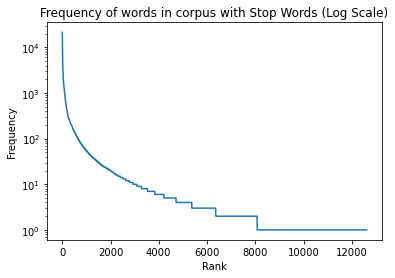

the     21447.0
and     20521.0
to      19351.0
we      13683.0
i       13411.0
you     11670.0
of      11469.0
a       11297.0
it       9831.0
that     9663.0
Name: Total, dtype: float64

In [12]:
dtm_stopwords.T.sort_values(by='Total', ascending=False).reset_index()['Total'].plot.line()
plt.title('Frequency of words in corpus with Stop Words (Log Scale)')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.yscale("log")
plt.show()
dtm_stopwords.T.sort_values(by='Total', ascending=False)['Total'].head(10)

(b) How did your corpus do? Have we stumbled upon a new discovery?

Same old story as always.

(c) BTW: Which explanation for Zipf's law in the context of language do you find most compelling, and why?

I think these words have become so ubiquitous to conveying information that there aren't really alternatives to these words. Like, how would you replace the, or, you, I.

Maybe there are some words in old english used as alternative for these words, but they're not common nowadays and if we'd like to convey words to the average person, we'll use average words.

(d) We're now going to choose some key words for your corpus. These are words that "characterise" or are especially informative of your corpus. You can use either frequently appearing words, words with high TF-IDF scores, or something else, such as using some other rule (e.g., "proper nouns") or simply choosing the words you're most interested in. List five key words below and why you've chosen them. If you don't have as many as five, explain why not.

I'm going to choose emails, obamacare, wall, and border

Hillary doesn't have any particularily good words in her tokens, trump has many,

I have also just found out how small the hillary corpus is compared to trump's but it's from a website that already had them all in there. Perhaps trump did more speeches than hillary?

(e) We're going to inspect concordance plots, or "key word in context" (KWIC) plots now. Before we do, generate one hypothesis you can test with a KWIC plot. For example, you could test whether two key words typically have different contexts around them, or whether one key word's contex has changed over time.

In trump's case, I expect jobs and mexico to share very similar contexts. As well as going.

In hillary's case, I expect insults to be in very similar contexts to other groups of people or donald trump

(f) Testing time! Generate the relevant plots!

In [13]:
from nltk.text import Text  
trump_text = nltk.Text(trump_tokens)
clinton_text = nltk.Text(clinton_tokens)

def getConcordance(string, candidate):
    if candidate.lower() == 'trump':
        trump_text.concordance(string.lower())
        print('\n')
    if candidate.lower() == 'clinton':
        clinton_text.concordance(string.lower())
        print('\n')
getConcordance('mexico', 'TrUmP')
getConcordance('insults', 'clinton')

Displaying 25 of 377 matches:
wheat right trade imbalance massive mexico unbelievably big trade imbalance ki
traffic tough build wall easily way mexico going pay wall going pay wall got g
ke country 'm going bring jobs back mexico booming booming friend builds plant
good news country well country well mexico unbelievable plants 'm building mex
ico unbelievable plants 'm building mexico never seen anything eighth wonder w
 job number one get jobs jobs going mexico going china going japan going place
ee ford see companies leaving going mexico like nothing make product sell back
ooked going jobs torn country going mexico china happening china isis military
 listen going fire everybody moving mexico another case booing know much effec
undreds companies moving case going mexico many go mexico case going mexico an
es moving case going mexico many go mexico case going mexico announce closing 
ng mexico many go mexico case going mexico announce closing going fire everybo
ing going fire everybo

(g) How did your hypothesis do? As ever, no need to worry about statistical significance right now -- and this inspection in particular is pretty analog. But please comment on whether the differences you hypothesized were borne out, and how you reached that conclusion.

I got them both right, Mexico is along the same contexts as going or moving jobs to.

Insults is along the same contexts and people like the gold star faimily, african americans, muslims, disabled, etc.

(h) We're going to do the same exercise for lexical dispersion plots. Again, they're pretty low-tech as NLP goes, but depending on your corpus could yield interesting insights. Generate one hypothesis about your corpus that you can test with a lexical dispersion plot(s).

I expect trump to ramp up his use of wikileaks and emails and variations by the end of the campaign, as well as mention FBI more often

I expect Hillary to use gold and star to line up almost perfectly, along with insult

(i) Ok, generate your plots!

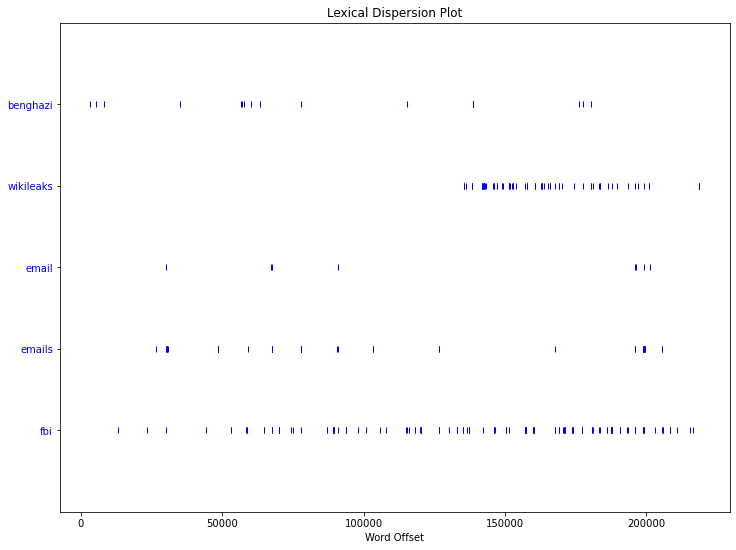

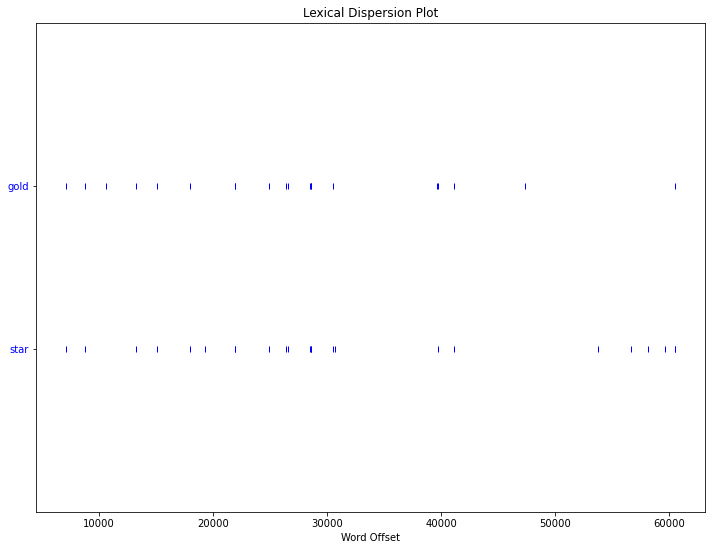

In [14]:
from nltk.draw.dispersion import dispersion_plot
plt.figure(figsize=(12, 9))
trump_words = ['benghazi', 'wikileaks', 'email', 'emails', 'fbi']
dispersion_plot(trump_text, trump_words, ignore_case=True, title='Lexical Dispersion Plot')
plt.figure(figsize=(12, 9))
clinton_words = ['gold','star']
dispersion_plot(clinton_text, clinton_words, ignore_case=True, title='Lexical Dispersion Plot')

(j) How did your hypothesis do? Briefly explain your assessment.

I think they were both correct!

## 4. Comparing documents: similarity

(a) Now we're going to compare documents in your corpus. First, we'll examine similarity. Generate one hypothesis you can test regarding the likely similarity of documents in your corpus (between different types, over time, by different authors, etc.). You may test all documents or some subset -- whatever makes sense for your hypothesis and corpus.

I expect most of the corpus words to be shared with the other

(b) Evaluate the cosine similarity between the documents specified in your hypothesis above.

https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/

In [15]:
import math
from math import *
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(dtm.iloc[:2], dtm.iloc[:2])
print("similarity: ", cos[0][1]) 
print('Angle: ', math.degrees(math.acos(cos[0][1])))

similarity:  0.9996544073064795
Angle:  1.5063726241857764


(c) How did your hypothesis hold up? Briefly explain your assessment.

Yea this is what I expected, most words are shared between the two candidates

(d) Now we're going to test your hypothesis using a different distance metric (you can use any you like). Briefly describe which you chose and why ("I learned Euclidean distance in another class" is a fine answer here!).

I learned something about eucledian distance in my linear algebra class but don't remember it much to be honest :/

And I don't really know how to interpret this result to be honest

(e) Test your hypothesis using the additional distance metric you selected above.

In [16]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(dtm.iloc[:2], dtm.iloc[:2])[0][1]

161522.4381997746

(f) How did your hypothesis hold up with this alternative distance metric? Briefly explain your assessment.

I am not sure if this number is correct due to the fact that the Trump corpus is almost 4 times as big as the hillary one. 

(g) Which distance metric do you think is more appropriate for your corpus, and why?

I don't know why but I feel that the cosine similarity is easier to interpret and use.

(h) Did anything in this similarity analysis surprise you? Why or why not?

Just how similar the words were in each corpus, I expected more differences but that wasn't the case, even given the vastly different corpus sizes

## 5. Comparing documents: diversity & complexity

(a) We're going to explore the linguistic diversity and complexity of your corpus. First, a few conceptual questions: what is meant by *lexical diversity*, and why is it so hard to measure?

Lexical diversity is the variety of unique words in each corpus compared to the other

(b) What are some reasons why we might want to measure the diversity of a document or corpus? (There are no wrong answers except variants on "none"!)

There are many ways of expressing diversity, not only counting unique words per document (different POS, use of political lingo, etc)

(c) What is meant by *linguistic complexity*, and why is it so hard to measure?

Linguistic complexity is a measure of how readable or rich a text is in its tokens. It is hard to measure because, like diversity there are many ways of measuring it. We also did an example in class where for people whose native language is japanese, mandarin might be easier to learn that for native english speakers.

(d) What are some reasons why we might want to measure the complexity of a document or corpus? (There are no wrong answers except variants on "none"!)

We might want to measure how different two documents speak on a similar subject, or whether one just elongates sentences to seem "smarter" than it really is. There are many reasons to do this.

(e) Generate a hypothesis about the lexical diversity in your corpus -- again, by some subset of documents, or over time, or anything you like. We aren't being too particular about the theoretical motivations behind your hypothesis -- just something you think is even vaguely (hopefully) interesting is fine.

For the mere fact that Trump's document is larger than Clinton's, I expect trump's to have more diversity, but Trump is also known to use very simple, child-like sentences in his speeches instead of large words.

https://shravan-kuchkula.github.io/Lexical-Diversity/#lexical-diversity

(f) Test your hypothesis using one measure of lexical diversity.

In [17]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total
texts = [clinton_tokens, trump_tokens]

lexicalDiversity = [lexical_diversity(text) for text in texts]
tokens = [len(text) for text in texts]
types = [len(set(text)) for text in texts]

ld_ttr = pd.DataFrame({'tokens': tokens, 'types': types,
                   'lexical_diversity': lexicalDiversity})
ld_ttr = ld_ttr.sort_values(by='lexical_diversity', ascending=False).rename(index={0: 'Clinton', 1:'Trump'})

In [18]:
ld_ttr

,tokens,types,lexical_diversity
Clinton,61819,6743,0.109076
Trump,223084,10087,0.045216


(g) Test your hypothesis using another measure of lexical diversity.

In [19]:
def lexical_diversity(text):
    return len(set(text)) / sqrt(len(text))

def percentage(count, total):
    return 100 * count / sqrt(total)
texts = [clinton_tokens, trump_tokens]
lexicalDiversity = [lexical_diversity(text) for text in texts]
tokens = [sqrt(len(text)) for text in texts]
types = [len(set(text)) for text in texts]
ld_r = pd.DataFrame({'tokens': tokens, 'types': types,
                   'lexical_diversity': lexicalDiversity})
ld_r = ld_r.sort_values(by='lexical_diversity', ascending=False).rename(index={0: 'Clinton', 1:'Trump'})
ld_r

,tokens,types,lexical_diversity
Clinton,248.63427,6743,27.120155
Trump,472.31769,10087,21.356388


(h) How did your hypothesis hold up in these two models? Which model of lexical diversity do you think is a better fit for your work, and why? 

Both are correct! Clinton used more diverse words in her speehces even though they were 1/4 length of Trump's

(i) We'll do a similar, but shorter analysis for complexity. What's a hypothesis you can test? (Your answers can be brief, as a reminder!)

Trump's speeches are less complex that Hillary's by a substantial margin

To use Spacy I had to cut trump's speeches into thirds and get stats on each third individually, then averaged these all out.

(j) Test your hypothesis from above using one measure of complexity. (You won't have to use a second one this time.)

In [35]:
nlp = spacy.load('en_core_web_sm')
clinton_spacydoc = nlp(clinton)
trump_spacydoc1 = nlp(trump[:999999])
trump_spacydoc2 = nlp(trump[1000000:1999999])
trump_spacydoc3 = nlp(trump[2000000:2622073])

In [36]:
from spacy_readability import Readability
nlp.add_pipe(Readability())

In [38]:
print('Clinton Readability Statistics\n')
print('Flesch Kincaid Grade Level: ', clinton_spacydoc._.flesch_kincaid_grade_level)
print('Flesch Kincaid Reading Ease:  ',clinton_spacydoc._.flesch_kincaid_reading_ease)
print('Dale Chall: ', clinton_spacydoc._.dale_chall)
print('Smog: ', clinton_spacydoc._.smog)
print('Coleman Liau Index: ', clinton_spacydoc._.coleman_liau_index)
print('Automated Readability Index: ', clinton_spacydoc._.automated_readability_index)
print('Forcast', clinton_spacydoc._.forcast)

trump_kincaid_gl = 0
trump_kincaid_re = 0
trump_dale_chall = 0
trump_smog = 0
trump_cl_index = 0
trump_autori = 0
trump_forcast = 0
for trump in [trump_spacydoc1, trump_spacydoc2, trump_spacydoc3]:
    trump_kincaid_gl += trump._.flesch_kincaid_grade_level
    trump_kincaid_re += trump._.flesch_kincaid_reading_ease
    trump_dale_chall += trump._.dale_chall
    trump_smog += trump._.smog
    trump_cl_index += trump._.coleman_liau_index
    trump_autori += trump._.automated_readability_index
    trump_forcast += trump._.forcast
print('\nTrump Readability Statistics\n')
print('Flesch Kincaid Grade Level: ', trump_kincaid_gl/3)
print('Flesch Kincaid Reading Ease:  ',trump_kincaid_re/3)
print('Dale Chall: ', trump_dale_chall/3)
print('Smog: ', trump_smog/3)
print('Coleman Liau Index: ', trump_cl_index/3)
print('Automated Readability Index: ', trump_autori/3)
print('Forcast', trump_forcast/3)

Clinton Readability Statistics

Flesch Kincaid Grade Level:  4.807858317246026
Flesch Kincaid Reading Ease:   79.9887423661505
Dale Chall:  7.4482788455837365
Smog:  14.21603231612426
Coleman Liau Index:  6.5396551549193696
Automated Readability Index:  4.126606026937441
Forcast 12.9

Trump Readability Statistics

Flesch Kincaid Grade Level:  3.676956292257813
Flesch Kincaid Reading Ease:   84.09314950138184
Dale Chall:  7.43812685357518
Smog:  12.585993184840518
Coleman Liau Index:  5.70772811670319
Automated Readability Index:  2.925508068815391
Forcast 11.833333333333334


(k) How did your hypothesis do? Briefly explain your assessment.

We can see that even though Trump's speeches were almost 4 numerous as large as Hillary's (~600k words vs 2.3m words), Hillary's readability stats are larger. 

Flesch Kincaid level is a whole grade above Trump's for hillary. 

Reading ease is lower for Hillary (More complicated text)

Dale Chall is about the same.

Coleman index for Hillary is a whole point above Trump's

Smog is higher for Hillary by almost two levels.

Automated Readability is higher for Hillary by a substantial margin. 

Forcast was also larger for Hillary

(l) Did you learn anything surprising about your corpus or documents during the diversity and complexity analyses? Why or why not?

Even though Hillary's corpus is smaller than Trump's by a large margin, her speech readability is "harder" by every metric shown above. This goes along the lines of what people have said regarding Trump's speeches being more universally able to be understood than Hillary's

## 6. Sentiment analysis

(a) Finally, we're going to conduct sentiment analysis on your corpus. You may use either a dictionary-based analysis or a classifier (or both!). Which approach will you use, and why? (If you're using a dictionary-based approach, comment briefly on which dictionary(ies) may be helpful.)

I am using an already defined NLTK pre-trained sentiment analyzer from https://realpython.com/python-nltk-sentiment-analysis/.

I've read it is a bit worse with lengthy texts so I'm not sure if this is the best use for it, but we'll try that out.

(b) Generate one hypothesis you can test regarding the sentiment of documents in your corpus. This can be about polarity (positive vs. negative) or something else, as is appropriate for your work and interests.

Trump speeches are going to be more pessimistic in general than Hillary's

(c) Test your hypothesis with sentiment analysis!

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
print(sia.polarity_scores(clinton))
print(sia.polarity_scores(trump))

{'neg': 0.061, 'neu': 0.767, 'pos': 0.172, 'compound': 1.0}
{'neg': 0.109, 'neu': 0.742, 'pos': 0.15, 'compound': 1.0}


(d) How did your hypothesis hold up? Briefly explain your assessment.

So Trump and Hillary had close to the same Neutral score, but Trump's positive words are less than Hillary's by this index's measurement, and substantially larger in the negative territory, going along with my hypothesis.

(e) Did anything you learned about your corpus during your sentiment analysis surprise you? Why or why not?

Not really surprising, perhaps if you ran this on democrat and republican presidents who have more of a professional role instead of trying to lure people to vote for them the statistics and analysis would've been completely different.

## 8. Summing up

(a) Overall, do you think that these particular analyses were helpful in better understanding your questions and hypotheses about these documents? (It's ok if the answer is no -- not all documents lend themselves to the analyses we've focused on.) Why or why not?

I feel these types of analyses work amazing for my type of data because there's definitely a lot of nuances in political speeches.

(b) What is the greatest strength of the analysis you conducted in this assignment?

Definitely the biggest strenght is finding differences in speech strategies, Trump's speeches were far more effective, perhaps, in appealing to more people than Hillary's.

I have no idea if Hillary actually gave 1/4 of the speeches Trump did, but perhaps Trump's massive amounts of speeches combined with a simpler vocabulary and more negative terms to appeal to emotions made the perfect campaign.

(c) What is the greatest weakness in the analysis you conducted in this assignment? (Remember, your answers can still be brief!)

I feel my biggest weakness is having so little Clinton speeches, I couldn't find another database with both candidates' speeches.

(d) What is an additional analysis (or analyses) that you imagine you could do in the future that would help you understand the questions you have about this corpus? The main concept we aren't including in this homework is topic modeling, but you're welcome to comment on anything else that perhaps you've encountered in the wild or simply think up on your own!

I could've easily found this out but I'm interested in seeing what each politican had in their platform that the other didn't. For example, hillary probably talked more about the environment and healthcare than Trump, and trump probably talked about taxes and immigration more than Hillary. I guess I'll find this out later.

Also, might I add, I had way more fun in this assignment than the last one, perhaps because sentiment analysis is more interesting than finding tokens in a text, but I feel like I could really make some cool personal projects using the analysis I used here!

My project is on politician's twitter bios but I was originally doing sport's discussions. I'll see if I can get it done by the end of the semester but if I ever do I'll be sure to show Prof. Jones-Rooy the different analyses and results I made happen!

# The end! 

Congratulations on finishing your second assignment! Hopefully this was a good chance to practice everything we've gone over in class, as well as to have an opportunity to think about analysing texts in the context of hypotheses. And hopefully it was even fun (and not too tedious!!). 

If nothing else, you've now already done a lot of the work that's needed for the project!